In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from functools import lru_cache

In [2]:
@lru_cache(maxsize=None)  
def fetch_data_from_source(parquet_file):
    df = pd.read_parquet(f"https://data3001-racing.s3.ap-southeast-2.amazonaws.com/{parquet_file}")
    return df

def fetch_data_csv(parquet_file):
    df = pd.read_csv(f"https://data3001-racing.s3.ap-southeast-2.amazonaws.com/{parquet_file}")
    return df

In [4]:
turns_df = fetch_data_csv('f1sim-ref-turns.csv')
left_df = fetch_data_csv('f1sim-ref-left.csv')
right_df = fetch_data_csv('f1sim-ref-right.csv')
line_df = fetch_data_csv('f1sim-ref-line.csv')

In [34]:
turns_df

,TURN,APEX_X1,APEX_Y1,CORNER_X1,CORNER_Y1,CORNER_X2,CORNER_Y2
0,1,375.570000,191.519000,315,145,405,260
1,2,368.930000,90.000000,350,0,402,145
2,3,727.500000,-393.438930,702,-443,750,-295
3,4,601.000000,-455.000000,565,-535,645,-400
4,5,599.030370,-643.970000,535,-725,640,-580
5,6,235.931194,-862.330000,200,-912,290,-812
6,7,159.135352,-832.110000,105,-882,199,-782
7,8,-65.000000,-710.000000,-115,-810,-15,-600
8,9,-271.023529,232.624700,-325,182,-220,282
9,10,-390.782540,231.142360,-430,181,-330,281


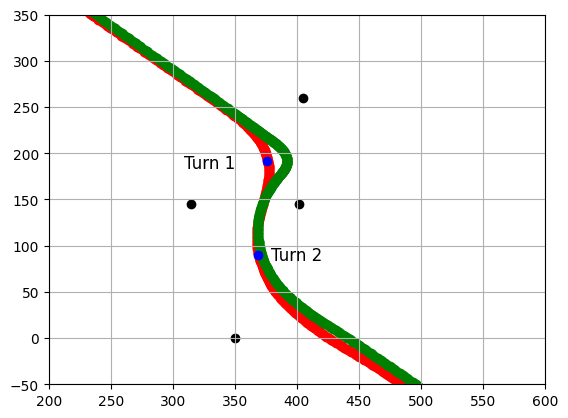

In [36]:
labels = ['Turn 1, Turn 2']
x = turns_df["APEX_X1"][0:2]
y = turns_df["APEX_Y1"][0:2]

plt.scatter(line_df["WORLDPOSX"], line_df["WORLDPOSY"], c='red')
plt.scatter(left_df["WORLDPOSX"], left_df["WORLDPOSY"], c='green')
plt.scatter(turns_df['CORNER_X1'], turns_df['CORNER_Y1'], c='black')
plt.scatter(turns_df['CORNER_X2'], turns_df['CORNER_Y2'], c='black')
plt.scatter(x, y, c='blue')
plt.text(330, 180, 'Turn 1', fontsize=12, color='black', ha='center', va='bottom')
plt.text(400, 80, 'Turn 2', fontsize=12, color='black', ha='center', va='bottom')
plt.xlim(200, 600)
plt.ylim(-50, 350)
plt.grid(True)
plt.show()